# BIOS512 Assignment #5

🌬 For this assignment we are going to work with [Canada wind turbine](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/readme.md) data from TidyTuesday. 💨

Use `read_csv` to load the data from the TidyTuesday GitHub repository. The project URL is can be found at [https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-10-27/).

In [1]:
library('tidyverse')

wind_turbine <- readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-10-27/wind-turbine.csv')

wind_turbine |> head()

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Rows: 6698 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (8): province_territory, project_name, turbine_identifier, turbine_numbe...
dbl (7): objectid, total_project_capacity_mw, turbine_rated_capacity_k_w, ro...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


objectid,province_territory,project_name,total_project_capacity_mw,turbine_identifier,turbine_number_in_project,turbine_rated_capacity_k_w,rotor_diameter_m,hub_height_m,manufacturer,model,commissioning_date,latitude,longitude,notes
<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,Alberta,Optimist Wind Energy,0.90,OWE1,1/2,150,23,30,Bonus,AN 150/30,1993,49.52535,-114.0548,NA
2,Alberta,Castle River Wind Farm,44.00,CRW1,1/60,600,44,40,Vestas,V44/600,1997,49.51264,-114.0357,NA
3,Alberta,Waterton Wind Turbines,3.78,WWT1,1/6,600,44,50,Vestas,V44/600,1998,49.23307,-113.6549,NA
4,Alberta,Waterton Wind Turbines,3.78,WWT2,2/6,600,44,50,Vestas,V44/600,1998,49.23303,-113.6302,NA
5,Alberta,Waterton Wind Turbines,3.78,WWT3,3/6,600,44,50,Vestas,V44/600,1998,49.21755,-113.6802,NA
6,Alberta,Waterton Wind Turbines,3.78,WWT4,4/6,660,47,50,Vestas,V47/660,2000,49.21773,-113.6579,NA


Each row in the table represents a single turbine.

Make a bar chart 📊 **sorted by frequency** of turbine count per province territory. (Hint: `fct_infreq` will sort your factor levels by frequency for subsequent plotting)

province_territory,n
<chr>,<int>
Alberta,900
British Columbia,292
Manitoba,133
New Brunswick,119
Newfoundland and Labrador,27
Northwest Territories,4
Nova Scotia,310
Ontario,2663
Prince Edward Island,104


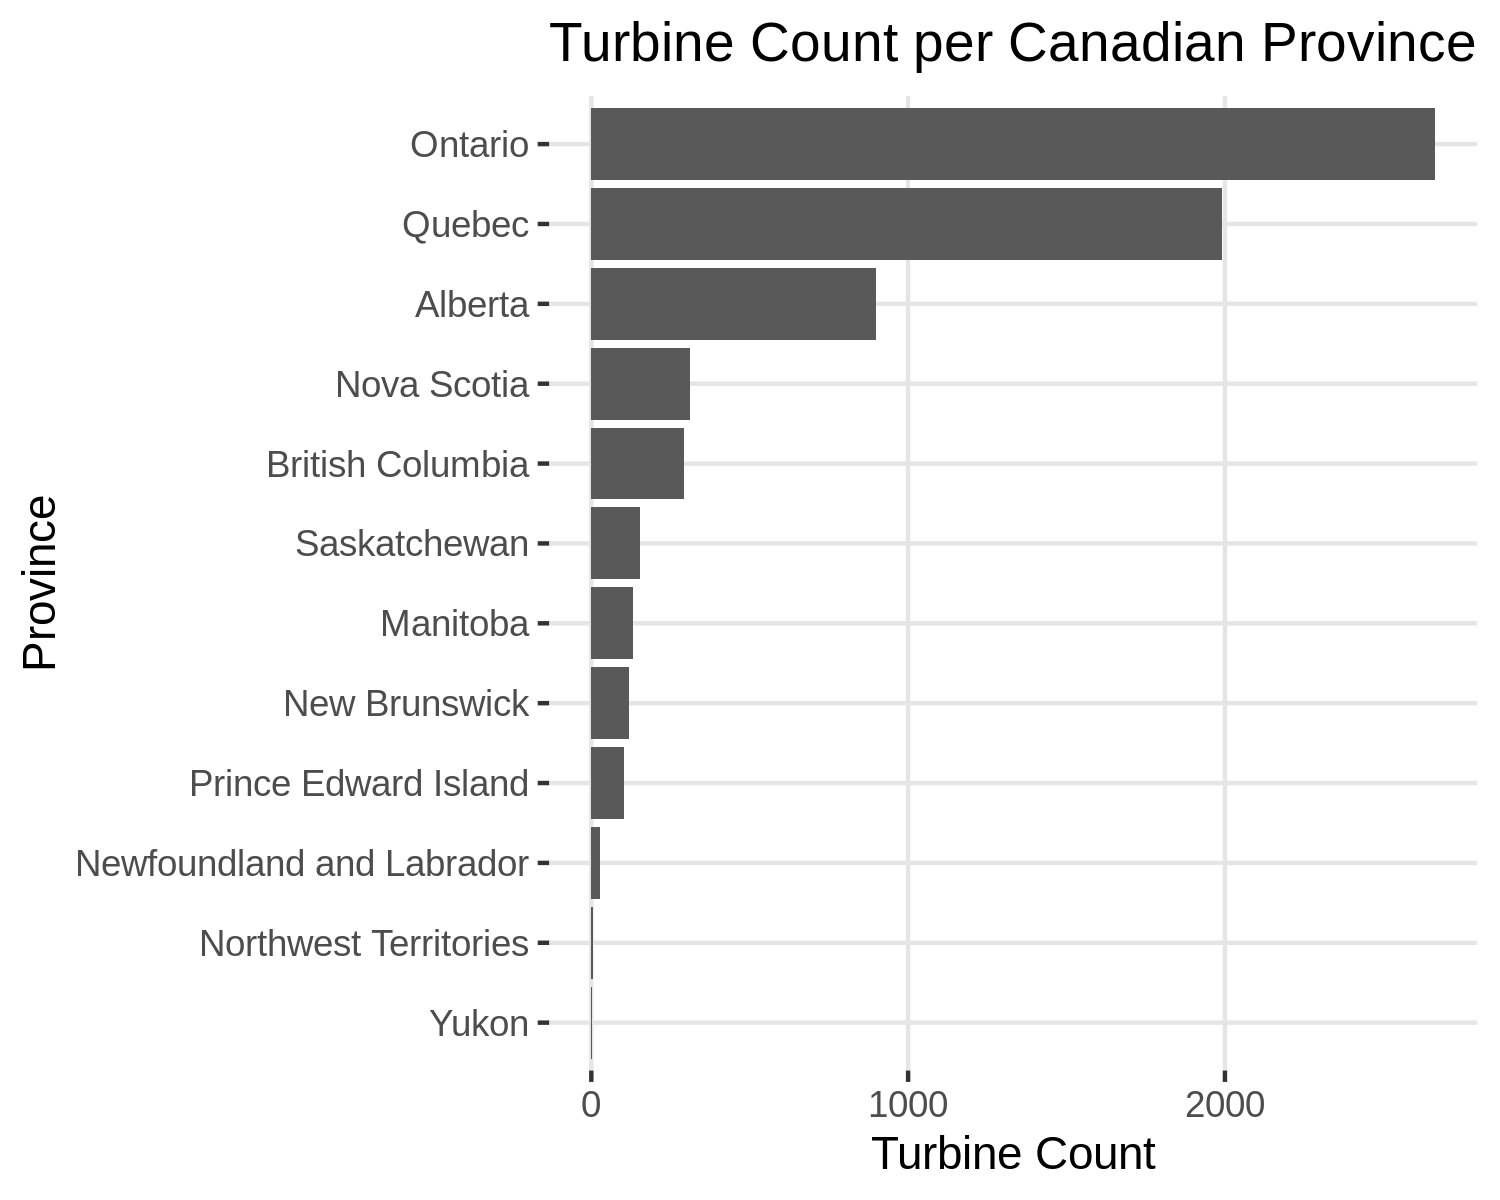

In [2]:
wind_turbine |> count(`province_territory`)

wt2 = wind_turbine |>
    mutate(province_territory = fct_infreq(province_territory) |> fct_rev())

p = ggplot(wt2, aes(y = province_territory)) + 
    geom_bar() +
    labs(x = 'Turbine Count', y = 'Province', title = "Turbine Count per Canadian Province") +
    theme(panel.grid.major = element_line(color = "gray90"), panel.background = element_blank())

p

Make a bar chart **sorted by frequency** of turbine count per manufacturer. **Group the low frequency manufacturers into an `Other` category**.

**Bonus:** Can you force the `Other` category to be the last bar? 

manufacturer,n
<chr>,<int>
Acciona,34
Acciona Wind Power,40
Bonus,2
DeWind,5
Enercon,960
EWT,2
Gamesa,8
GE,1725
Lagerwey,2


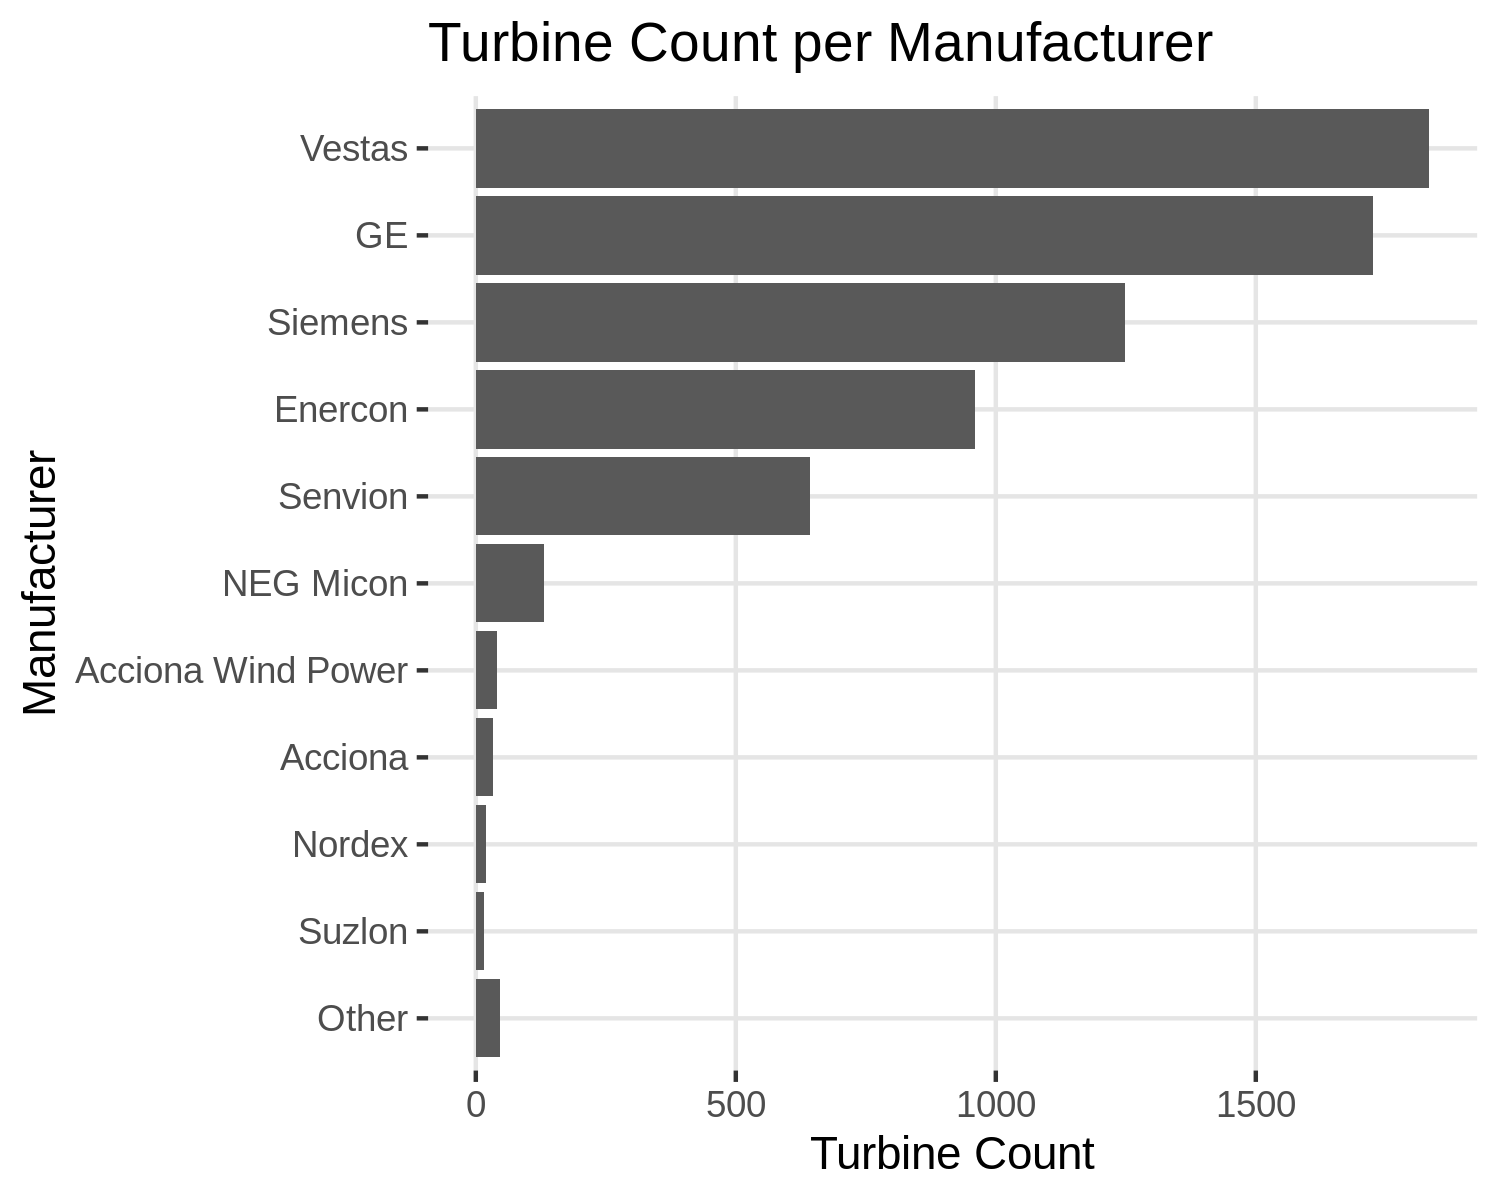

In [6]:
wind_turbine |> count(`manufacturer`)

wt3 = wind_turbine |>
    mutate(manufacturer = fct_infreq(manufacturer) |> fct_rev())

wt3_lumped = wt3 %>%
    mutate(manufacturer_lumped = manufacturer %>% 
           fct_lump(n = 10) %>% 
           fct_infreq() %>% 
           fct_relevel('Other', after= Inf) %>%
           fct_rev())

p = ggplot(wt3_lumped, aes(y = manufacturer_lumped)) +
    geom_bar() +
    labs(x = 'Turbine Count', y = 'Manufacturer', title = "Turbine Count per Manufacturer") +
    theme(panel.grid.major = element_line(color = "gray90"), panel.background = element_blank())   

p